# Simulated Graph Models

In [1]:
import graspy

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Erdos-Renyi (ER)

ER graphs are the simplest generative model. We assume that each edge is sampled independently from all the edges. As such, one can  There are two ways to parameterize the model:

1. ER(n, p) - this model specifies the number of vertices, $n$, and each pair of vertices has $p$ probability of an edge existing between the two.
2. ER(n, m) - this model specifies the number of vertices, $n$, and the total number of edges $m$.

Below, we sample two graphs (undirected and no self-loops) $G_1 \sim ER_{NP}(50, 0.3)$ and $G_2 \sim ER_{NM}(50, 250)$.

In [2]:
from graspy.simulations import er_nm, er_np

n = 50
m = 250
p = 0.3

np.random.seed(1)
G1 = er_np(n, p)
G2 = er_nm(n, m)

### Visualize the graphs using heatmap

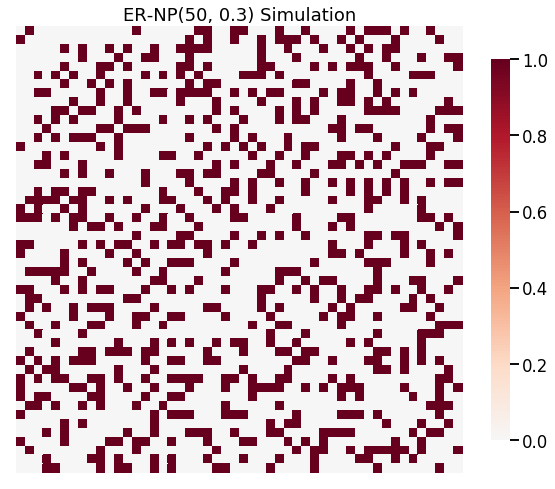

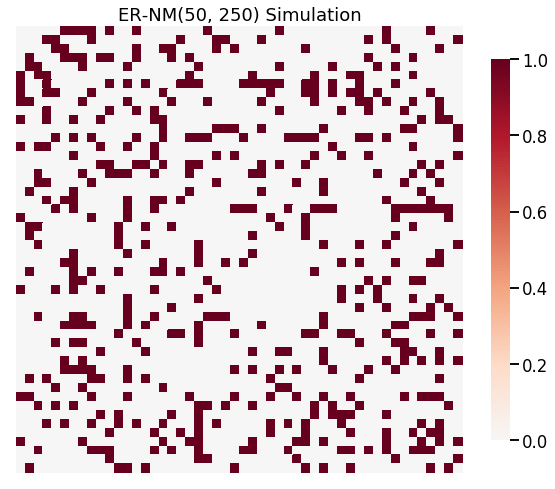

In [3]:
from graspy.plot import heatmap

heatmap(G1, title = 'ER-NP(50, 0.3) Simulation')
heatmap(G2, title='ER-NM(50, 250) Simulation')

## Stochastic Block Model (SBM)

Unlike ER models, SBM tends to produce graphs containing communities, subsets characterized by being connected with one another with particular edge densities. For example, edges may be more common within communities than between communities <sup>[1](https://en.wikipedia.org/wiki/Stochastic_block_model)</sup>.

SBM is parametrized by $n$, which is the number of vertices in each community, and a block probability matrix, $P$, which has size number of communites by number of communities.

Below, we sample a graph (undirected, no self-loops) with following parameters:
\begin{align*}
   n &= [50, 50]\\
   P &= \begin{bmatrix} 
       0.5 & 0.2\\
       0.2 & 0.05
       \end{bmatrix}
\end{align*}

In [4]:
from graspy.simulations import sbm

n = [50, 50]
P = [[0.5, 0.2],
     [0.2, 0.05]]

np.random.seed(1)
G = sbm(n, P)

### Visualizing the graph using heatmap

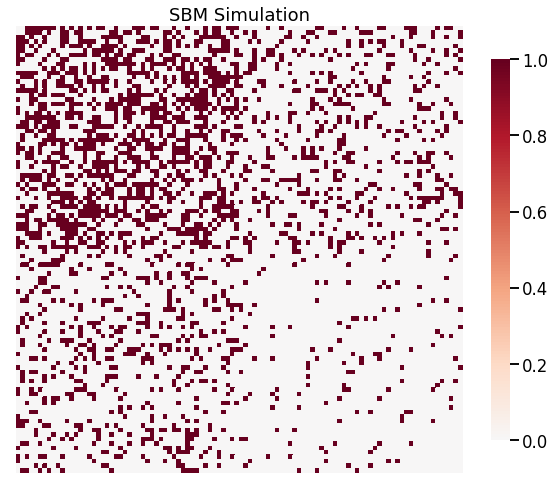

In [5]:
heatmap(G, title ='SBM Simulation')

## Random Dot Product Graphs (RDPGs)

RDPG is a latent position generative model, in which the probability of an edge existing between pairs of vertices is determined by the dot product of the associated latent position vectors. In other words, given $X \in \mathbb{R}^{n\times d}$, where $n$ is the number of vertices and $d$ is the dimensionality of each vector, the probability matrix $P$ is given by:

\begin{align*}
P = XX^T
\end{align*}

Both ER and SBM models can be formulated as a RDPG. Below, we sample $ER_{NP}(100, 0.5)$ using RDPG formulation. In this case, we set $X \in \mathbb{R}^{100\times 2}$ where all the values in $X$ is 0.5. This results in $P$ matrix where all the probabilities are also 0.5.

In [6]:
from graspy.simulations import rdpg

# Create a latent position matrix
X = np.full((100, 2), 0.5)
print(X @ X.T)

[[0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]


In [7]:
np.random.seed(1)
G = rdpg(X, loops=False)

### Visualizing the graph as heatmap

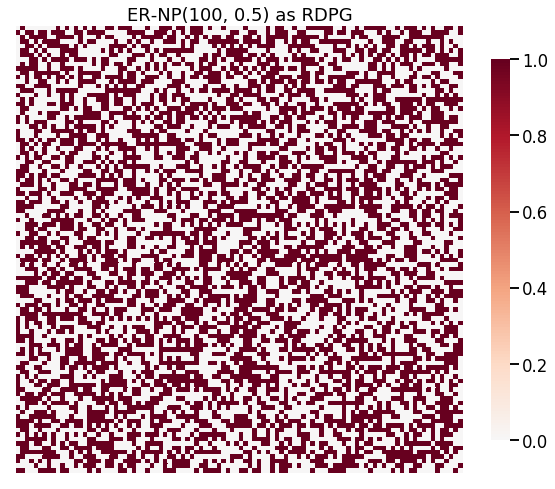

In [8]:
heatmap(G, title='ER-NP(100, 0.5) as RDPG')